In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple)
from opdynamics.utils.results_tools import get_experiment_mean_data, get_runs_paths
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [3]:
params = parse_experiment_params("../experiments_params/case_6.json")
results = get_experiment_mean_data(params, "../results/case_6/")

In [4]:
def f(params, results_path):
    runs = get_runs_paths(params, results_path)
    num_runs = len(runs)
    
    convergence_point = []
    
    for run in runs:
        run_data = pickle.load(open(run, "rb"))
        
        y = np.array(run_data['Entropy'])
        point = np.argwhere(np.abs(y - 4.9) < 0.01)[0].item()
        
        convergence_point.append(point)
        
    return np.mean(convergence_point), np.std(convergence_point)

In [7]:
points = {}

params = parse_experiment_params("../experiments_params/case_6.json")
for param in params:
    try:
        points[param['kappa']] = f(param, "../results/case_6/")
    except:
        pass
    
params = parse_experiment_params("../experiments_params/case_8.json")
for param in params:
    try:
        points[param['kappa']] = f(param, "../results/case_8/")
    except Exception as e:
        print(e)

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


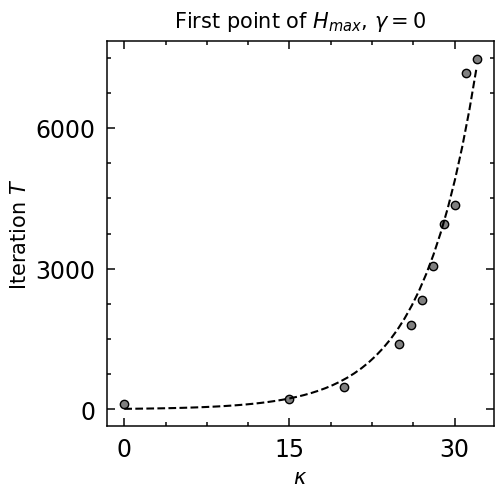

In [ ]:
nrows = 1
ncols = 1

titles = []
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Iteration $T$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"$\kappa$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

x = list(points.keys())
y = [x[0] for x in points.values()]
std = [x[1] for x in points.values()]

# axs[0].errorbar(x, y, yerr = std, fmt = 'o', c = 'grey', edgecolors = 'k')
axs[0].scatter(x, y, marker = 'o', c = 'grey', edgecolors = 'k')
p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 50)
y_fitted = a * np.exp(b * x_fitted)
axs[0].plot(x_fitted, y_fitted, '--', color = 'k')

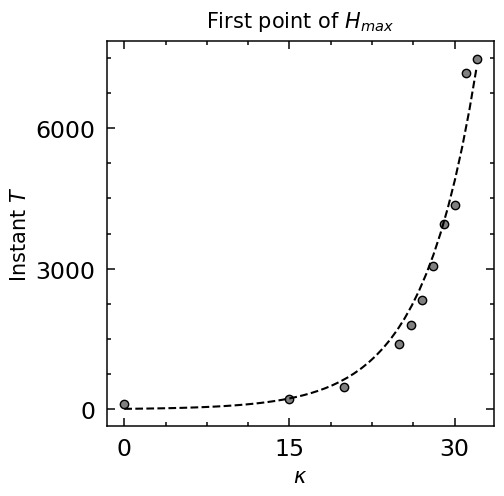

In [45]:
nrows = 1
ncols = 1

titles = [r"First point of $H_{max}$"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Instant $T$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"$\kappa$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

x = list(points.keys())
y = [x[0] for x in points.values()]
std = [x[1] for x in points.values()]

# axs[0].errorbar(x, y, yerr = std, fmt = 'o', c = 'grey', edgecolors = 'k')
axs[0].scatter(x, y, marker = 'o', c = 'grey', edgecolors = 'k')
p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 50)
y_fitted = a * np.exp(b * x_fitted)
axs[0].plot(x_fitted, y_fitted, '--', color = 'k')

112

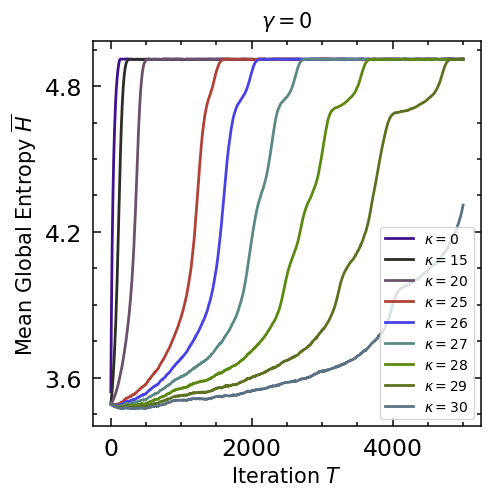

In [17]:
# parameters 

nrows = 1
ncols = 1

titles = [rf"$\gamma = {k}$" for k in [0]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0: "#40128B",
    15: "#2e2b28",
    20: "#6b506b",
    25: "#b04238",
    26: "#4942E4",
    27: "#5C8984",
    28: "#5C8911",
    29: "#5C7222",
    30: "#5C7284"
}

X = np.arange(1, 5000 + 1)

    
selected_params = [x for x in params if x['gamma'] == 0]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width, label = rf"$\kappa = {p['kappa']}$")
    
axs[0].legend(loc = "lower right")

In [20]:
np.arange(25, 29, 0.50)

array([25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5])

In [13]:
6*100*10/(4*60)

25.0